In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [4]:
data = pd.read_csv(r"C:\Users\amit9\Downloads\archive\creditcard.csv")

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
data.shape

(284807, 31)

# Data Cleaning

## Checking for Null values

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Checking for duplicate rows

In [8]:
data.duplicated().sum()

1081

In [9]:
data.drop_duplicates(keep = 'first', inplace = True)

In [10]:
data.duplicated().sum()

0

## Checking for data types of columns

In [11]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# EDA (Exploratory Data Analysis)

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [14]:
data.mean()

Time      94811.077600
V1            0.005917
V2           -0.004135
V3            0.001613
V4           -0.002966
V5            0.001828
V6           -0.001139
V7            0.001801
V8           -0.000854
V9           -0.001596
V10          -0.001441
V11           0.000202
V12          -0.000715
V13           0.000603
V14           0.000252
V15           0.001043
V16           0.001162
V17           0.000170
V18           0.001515
V19          -0.000264
V20           0.000187
V21          -0.000371
V22          -0.000015
V23           0.000198
V24           0.000214
V25          -0.000232
V26           0.000149
V27           0.001763
V28           0.000547
Amount       88.472687
Class         0.001667
dtype: float64

In [15]:
dist = data['Class'].value_counts()
dist

Class
0    283253
1       473
Name: count, dtype: int64

# Data Visualization

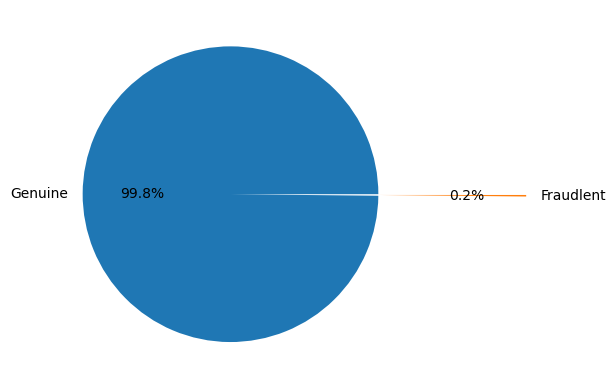

In [16]:
plt.pie(x = dist.values, labels = ['Genuine', 'Fraudlent'], autopct = "%1.1f%%", explode = [0,1])
plt.show()

The data is highly unbalanced with 99.8% Genuine transactions and 0.2% with fraudlent transactions...

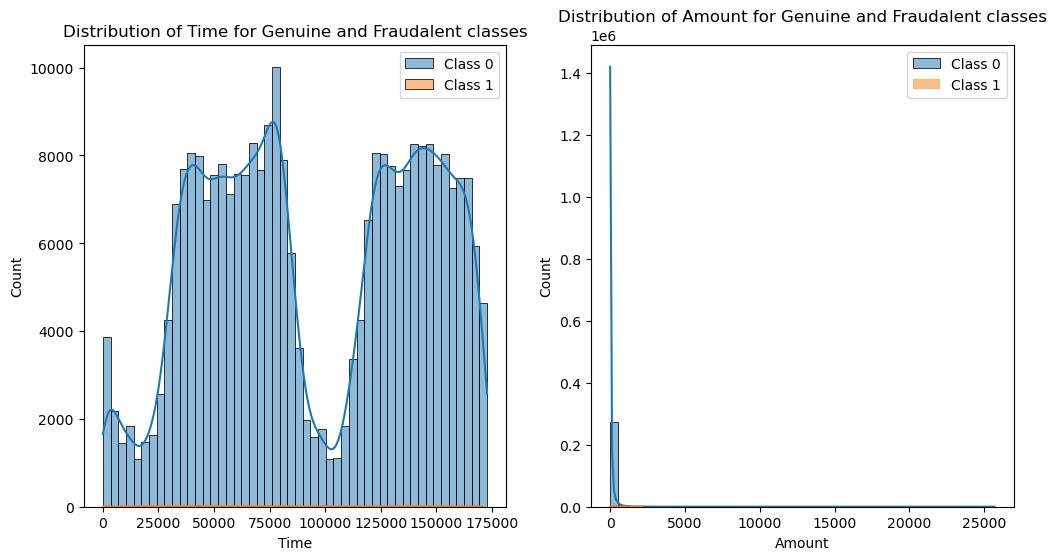

In [17]:
# Visualizing the distribution of Time and Amount features for both Classes

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
sns.histplot(data[data['Class'] == 0]['Time'], bins = 50, kde = True, label = 'Class 0')
sns.histplot(data[data['Class'] == 1]['Time'], bins = 50, kde = True, label = 'Class 1')
plt.title('Distribution of Time for Genuine and Fraudalent classes')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(data[data['Class'] == 0]['Amount'], bins = 50, kde = True, label = 'Class 0')
sns.histplot(data[data['Class'] == 1]['Amount'], bins = 50, kde = True, label = 'Class 1')
plt.title('Distribution of Amount for Genuine and Fraudalent classes')
plt.legend()

plt.show()

In [18]:
corr_matrix = data.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


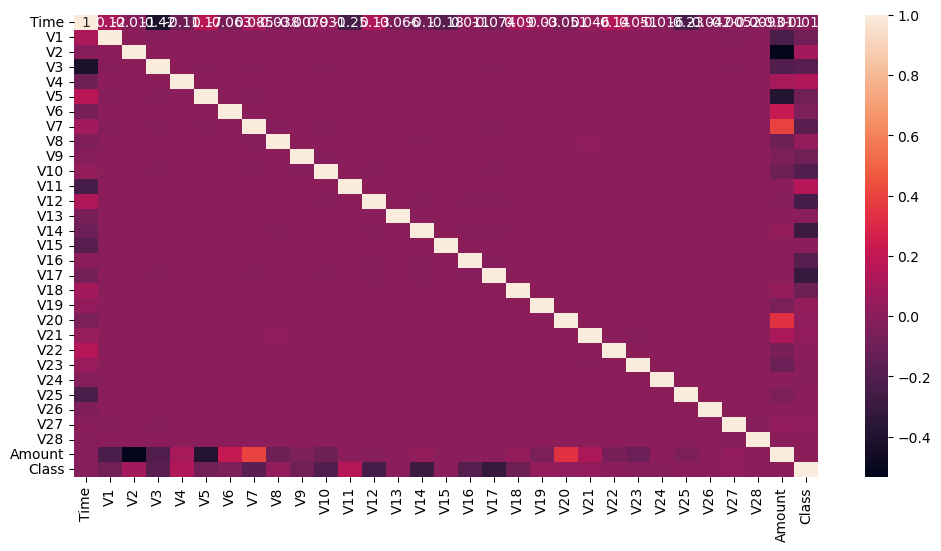

In [19]:
plt.figure(figsize = (12,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Data preprocessing

## Seperating the input and output varibles

In [20]:
X1 = data.drop(['Time', 'Amount', 'Class'], axis = 1)
y1 = data['Class']

In [21]:
temp_data_0 = data[data['Class'] == 0]
temp_data_0.shape

(283253, 31)

In [22]:
temp_data_1 = data[data['Class'] == 1]
temp_data_1.shape

(473, 31)

In [23]:
upd_data = pd.concat([temp_data_1[0:470], temp_data_0[150000: 150470]], axis = 0)
upd_data.shape

(940, 31)

In [24]:
upd_data['Class'].value_counts()

Class
1    470
0    470
Name: count, dtype: int64

Here while creating upd_data I left last 3 fraudalent entries in order to use it as an validation test for the given model while for non-fraudalent I have quite a lot of entries....

## Spliting the unbalanced data 

In [25]:
i_train, i_test, o_train, o_test = train_test_split(X1, y1, random_state = 3, test_size = 0.2, stratify = y1)

In [26]:
o_train.value_counts()

Class
0    226602
1       378
Name: count, dtype: int64

In [27]:
o_test.value_counts()

Class
0    56651
1       95
Name: count, dtype: int64

## Spliting the balanced data

In [28]:
X = upd_data.drop(['Amount', 'Time', 'Class'], axis = 1)
y = upd_data['Class']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3, stratify = y)

In [30]:
y_train.value_counts()

Class
1    400
0    399
Name: count, dtype: int64

In [31]:
y_test.value_counts()

Class
0    71
1    70
Name: count, dtype: int64

## Scaling the Input data

### Unbalanced Data Inputs

In [32]:
mn = MinMaxScaler(feature_range = (0,1))

In [33]:
i_train_sc = mn.fit_transform(i_train)

In [34]:
i_test_sc = mn.fit_transform(i_test)

### Balanced data Inputs

In [35]:
x_train_sc = mn.fit_transform(x_train)

In [36]:
x_test_sc = mn.fit_transform(x_test)

Now the data is ready to feed into the model for training...

# Machine Learning Model

In [40]:
clf_forest = RandomForestClassifier(n_estimators = 15, criterion = 'entropy')
clf_lr = LogisticRegression()
clf_gb = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.4, n_estimators = 15)

## Training the model

In [41]:
clf_forest.fit(i_train, o_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [42]:
clf_lr.fit(i_train, o_train)

LogisticRegression()

In [43]:
clf_gb.fit(i_train, o_train)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=15)

## Evaluating the Model Perfomance

In [44]:
clf_forest.score(i_test, o_test)

0.9995418179254926

In [45]:
clf_gb.score(i_test, o_test)

0.9983082508018186

In [46]:
clf_lr.score(i_test, o_test)

0.9990307686885419

# Checking if it works for the validation data

In [47]:
temp_data_1.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [48]:
input_data = temp_data_1.tail(3).drop(['Time', 'Amount', 'Class'], axis = 1)
input_data.reset_index(inplace = True)
input_data.drop('index', axis = 1, inplace = True)
input_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
1,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700
2,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309


In [49]:
def predict_fraudalent(lst):
    input = mn.fit_transform(lst)
    
    op_forest = clf_forest.predict(input)
    op_lr = clf_lr.predict(input)
    op_gb = clf_gb.predict(input)
    
    print(op_forest)
    print(op_lr)
    print(op_gb)

In [50]:
ip1 = np.array(input_data.iloc[0]).reshape(1, -1)
ip1

array([[-6.76142671e-01,  1.12636606e+00, -2.21369952e+00,
         4.68308388e-01, -1.12054104e+00, -3.34629600e-03,
        -2.23473930e+00,  1.21015796e+00, -6.52249920e-01,
        -3.46389088e+00,  1.79496897e+00, -2.77502154e+00,
        -4.18950144e-01, -4.05716238e+00, -7.12615969e-01,
        -1.60301475e+00, -5.03532592e+00, -5.06999884e-01,
         2.66272320e-01,  2.47967753e-01,  7.51825538e-01,
         8.34107690e-01,  1.90943873e-01,  3.20700856e-02,
        -7.39694823e-01,  4.71110963e-01,  3.85107449e-01,
         1.94361479e-01]])

In [51]:
predict_fraudalent(ip1)

[0]
[0]
[0]


In [69]:
ip3 = np.array(X1.iloc[10]).reshape(1,-1)
ip3

array([[ 1.44904378, -1.17633883,  0.91385983, -1.37566665, -1.97138317,
        -0.62915214, -1.4232356 ,  0.04845589, -1.72040839,  1.62665906,
         1.19964395, -0.67143978, -0.51394715, -0.09504505,  0.23093041,
         0.03196747,  0.25341472,  0.85434381, -0.22136541, -0.38722647,
        -0.0093019 ,  0.31389441,  0.02774016,  0.50051229,  0.25136736,
        -0.12947795,  0.04284987,  0.01625326]])

In [54]:
predict_fraudalent(ip3)

[0]
[0]
[0]


The random forest and the logistic regression model both are predicting the fraudalent transactions but the same cannot be said about the gradient descent model...

# Model Training and perfomance on equally distributed Data

In [55]:
model_rf = RandomForestClassifier(n_estimators = 15, criterion = 'gini')
model_gd = GradientBoostingClassifier(n_estimators = 33, learning_rate = 0.2)
model_lr = LogisticRegression()

## Training the Models

In [56]:
model_gd.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=33)

In [57]:
model_lr.fit(x_train, y_train)

LogisticRegression()

In [58]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15)

## Model Perfomance

In [59]:
model_gd.score(x_test, y_test)

0.9858156028368794

In [60]:
model_lr.score(x_test, y_test)

0.9929078014184397

In [61]:
model_rf.score(x_test, y_test)

0.9929078014184397

In [86]:
y_pred_gd = model_gd.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_lr = model_lr.predict(x_test)

In [87]:
df_pred = pd.DataFrame({'Actual' : y_test, 'RF_Pred': y_pred_rf, 'GD_Pred' : y_pred_gd, 'LR_Pred' : y_pred_lr})
df_pred

,Actual,RF_Pred,GD_Pred,LR_Pred
14170,1,1,1,1
150889,0,0,0,0
150938,0,0,0,0
6338,1,1,1,1
163149,1,1,1,1
150895,0,0,0,0
79525,1,1,1,1
73857,1,1,1,1
53591,1,1,1,1
150908,0,0,0,0


# Validation entries on new models

In [80]:
def predict_fraudalent_transactions(lst):
    
    
    op_forest = model_rf.predict(lst)
    op_lr = model_lr.predict(lst)
    op_gb = model_gd.predict(lst)
    
    print(op_forest)
    print(op_lr)
    print(op_gb)

## checking for fraudalent transactions

In [81]:
predict_fraudalent_transactions(ip1)

[1]
[1]
[1]


In [82]:
ip2 = np.array(X1.iloc[150889]).reshape(1, -1)
ip2

array([[ 1.93929257,  0.83119625, -1.29143434,  4.02662451,  0.95360082,
        -0.62583709,  0.76463903, -0.44996678, -0.06687183,  1.14675084,
        -0.26382644, -2.82658587,  1.35662331,  2.04054161, -1.94969572,
         0.14497889,  0.27386535, -0.53903843, -1.63139782, -0.33741749,
        -0.01930369,  0.24101704, -0.01134724, -0.07238755,  0.37154051,
         0.13529089, -0.10642878, -0.07175971]])

In [83]:
predict_fraudalent_transactions(ip2)

[0]
[0]
[0]


In [85]:
predict_fraudalent_transactions(ip3)

[1]
[1]
[1]


# Finding the best model

## Gradient Boosting

In [89]:
print(classification_report(y_test, y_pred_gd))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.97      0.99        70

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



<Figure size 1200x600 with 0 Axes>

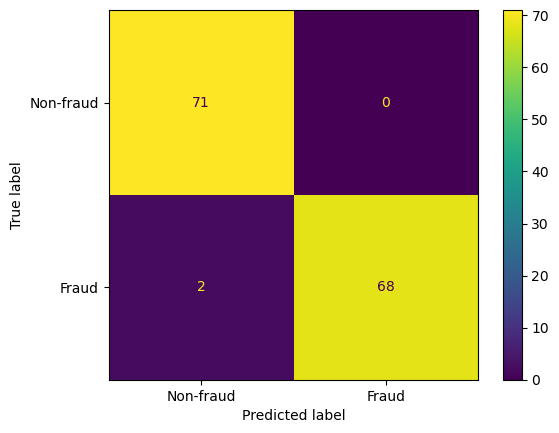

In [96]:
cm = confusion_matrix(y_test, y_pred_gd)

plt.figure(figsize = (12,6))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-fraud', 'Fraud'])
cm_display.plot()

plt.show()

## Random Forest

In [94]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.99      0.99        70

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



<Figure size 1200x600 with 0 Axes>

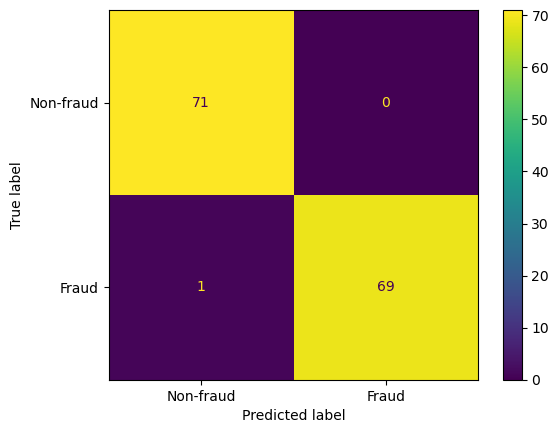

In [95]:
cmr = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (12,6))
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cmr, display_labels = ['Non-fraud', 'Fraud'])
cm_disp.plot()
plt.show()

## Logistic Regression

In [97]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.99      0.99        70

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



<Figure size 1200x600 with 0 Axes>

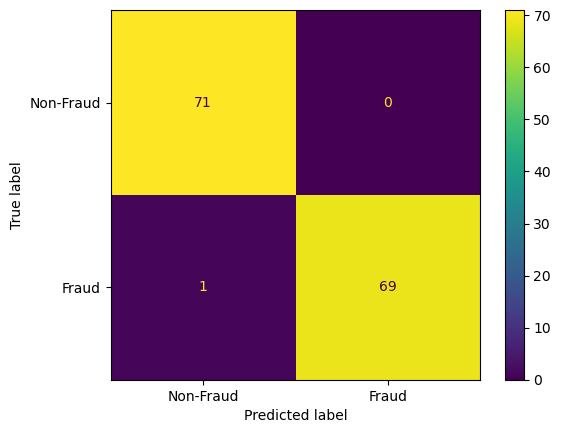

In [99]:
cml = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize = (12, 6))
cml_disp = ConfusionMatrixDisplay(confusion_matrix = cml, display_labels = ['Non-Fraud', 'Fraud'])
cml_disp.plot()
plt.show()

# K-Fold Cross Validation

In [105]:
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

In [107]:
cvs = StratifiedShuffleSplit(n_splits = 5, random_state = 3, test_size = 0.15)

## Logistic Regression

In [114]:
scores_lr = cross_val_score(model_lr, X, y, cv = cvs)
scores_lr

array([0.9929078 , 0.9929078 , 0.96453901, 0.9787234 , 0.9858156 ])

In [115]:
scores_lr.mean()

0.9829787234042552

## Random Forest

In [116]:
scores_rf = cross_val_score(model_rf, X, y, cv = cvs)
scores_rf

array([0.9929078 , 0.9787234 , 0.95744681, 0.9858156 , 0.9858156 ])

In [117]:
scores_rf.mean()

0.9801418439716313

Since the logistic regression model trained on the balanced data is showing better performance of 0.3% we will select it asthe best model....